<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/GMITLOGO.jpg" width="500"/></p>

# GMIT, H.Dip in Data Analytics, Programming for Data Analysis Project 2018

## 1. Introduction

This repository contains all of the files pertaining to my 2018 project submission for the Programming for Data Analysis module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of a 4 week period in November and December 2018. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project objective

The objective of this project is to sythesise a data set based on some real world phenomenon. This requires investigation in to the pheonmenon and then using  the `numpy.random` package in Python [2] to simulated some data based on this. The problem statement for the assignment is as follows [3]:

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
1. Synthesise/simulate a data set as closely matching their properties as possible.
1. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### 1.2 Choice of real world phenomenon

I am currently working as the production manager at a malt production facility in Ireland. Malting is a process whereby raw cereal grains (barley mainly) are re-hydrated to simulate planting in soil, and then let germinate for a number of days. During this germination process the cellular structure of the grain is modified, releasing starches. The grain is then kilned to stop the germination process while drying the grain, fixing the properties of the grain, and improving the colour and flavour characterisitcs of the final product. 

Worldwide, the largest consumers of malted barley are the brewing and distilling industries [4], using 96% of all malt produced. The most important property of any brewing or distilling malt is its *extract* which determines how much sugar is available for conversion to alcohol in the brewing (beer production) and distilling (whiskey production) processes [5]. Distillers are particularly interested in *spirit yield* to determine how much many litres of alcohol they are likely to get from each tonne of malt purchased.

The maltster's role in this process is to take a natural raw material and create a consistent product, which maximises the extract and spirit yield for their customers. There are many factors in the process which can influence the final extract and spirit yield. For this project we are only going to consider the relationship between the protein levels in the raw barley and the final extracts and predicted spirit yields (PSY).

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/maltingbarley.jpg" width="500"/></p>
   <p style="text-align: center;"> <b><I><a href="https://www.bratney.com/industries/malting--brewing">Malted Barley</a></I></b> </p>  


### 1.3 Plan for the project

The plan for this project is as follows:
1. Section 2 will give an a brief introduction to the malting process, and define the important variables for this project
1. In section 3 I will analyse an existing dataset to summarise the distributions of the various variables and the relationships between them
1. In section 4 I will synthesise a dataset using the relationships and distributions defined in section 3
1. Section 5 will cover some rudimentary analysis of the synthesised dataset
1. The project will be concluded in section 6

## 2. Overview of the Malting Process
### 2.1 Introduction to Malting

In this section I will outline a brief overview of the malting process. This should give a broad understanding of where the data set comes from, how the variables in it are expected to relate to one another, and how these relationships may be influenced by other factors. 

A process flow diagram for the process is shown below: 

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/process.png" width="850"/></p>
  <p style="text-align: center;"> <b><I>Malting Process Flow Diagram</I></b> </p> 


### 2.2 Barley Growing and Harvesting
The first and perhaps most important stage in the process is the barely growing and harvesting stage. The agronomic program given to a field of barley during its growing season can help determine the level of nitrogen and hence protein in the grain. In Ireland, spring malting barley is typically sown in March and harvested in August [7]. During this growing season, the grower is responsible for ensuring that the agonomic program used optimises the nitrogen content in the grain while balancing this with a good yield per acre sown. In Ireland,  there is a requirement for approximately 70% brewing barley and 30% distilling barely for any given harvest year. The maximum protein level allowed for distilling barely is 9.3% [8]. Barley for brewing can be accepted up to 10.8% [6]. During the growing season the farmer will apply a nitrogen based fertiliser to improve the growth in the barley. This will improve the yield per acre for the farmer. However, if too much fertiliser is applied (or it is applied too late in the season) the nitrogen levels in the harvested barley will be higher [9], [10] . This barely will be unsuitable for making distilling malt, and may even be rejected for brewing if the protein levels are too high.

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/spraying.jpg" width="650"/></p>
   <p style="text-align: center;"> <b><I><a href="https://www.agriland.ie/farming-news/new-fertiliser-rules-winter-barley/">Barley Spraying</a></I></b> </p>  
   
Another aspect that impacts protein levels in the grain is the weather during the growing season. When the plants are growing, the nitrogen levels in the corn is higher earlier in the growing season. The nitrogen comes from the soil and the fertiliser applied. Later in the season as the barley ripens, ready for harvesting, more starch arrives in the grains as they increase in size. If the barley growing season is too dry, the barley will ripen early before there is time for the grains to fill out with starch. This will result in higher protein barley.  

Another consideration at this stage is the variety of barley sown. There are many different barely varities and new ones are developed every year to try and:
* Improve yield for growers
* Improve disease resistance during the growing season
* Improve extracts for the brewers
* Improve yields for the maltsters
* Improve spirit yields for the distillers

### 2.3 Barley Intake, Drying and Storage
Once the grower believes that the barley is ready to be harvested, a sample is taken and tested for moisture and protein. Once the moisture and protein are in specification as agreed with the maltster, the farmer will proceed to cut the barley. When the harvested barley arrives at the intake, the load is sampled and tested for moisture and protein. The maltster will then segregate the barley based on the variety and protein content. Some barley stores will be allocated to ditilling barely (lowest protein), while others will be allocated to brewing. Most years there are 4 to 5 different barley varieties sown, as they each have different properties. This allows the maltster to blend the correct mix of them together to ensure the malt is consistent for brewing and distilling. 

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/sampling.jpg" width="550"/></p>
   <p style="text-align: center;"> <b><I><a href="http://www.ukmalt.com/barley-requirements">Barley Sampling at Intake</a></I></b> </p> 

The moisture level in the freshly cut barley is usually in the range of 15-21%. Barley at this moisture level is unsafe for long term storage as the grain will start to respire in storage and generate heat. This heat is conducive to microbial growth [11]. Grain at this moisture is also susceptible to mite infestation. Therefore the barely must be dried to below 13% moisture for safe storage. All barley storage areas have aeration systems that are used to cool the barley to below 13<sup>o</sup>C. This is done to prevent hot spots forming in the grain bulk. Note that barley may often be have to stored safely for up to 18 months before it is used.

### 2.4 Steeping
Once the barley is ready for malting, the maltster will take a batch of malt from a store (using either higher or lower protein barley depending on whether a brewing or distilling batch is required). The first process step in the malt house is steeping. Steeping is the controlled rehydration of the barley. For the maltster, the desired output from this process is to have the barley moisture in the region of 44-46%. Also, the grain should have begun to respire and generate heat. The temperature in the grain should have risen to approximately 18<sup>o</sup>C [12]. 

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/imagesteep.jpg" width="450"/></p>
   <p style="text-align: center;"> <b><I><a href="http://merryn.dineley.com/2016/09/a-morning-with-maltsters-part-three-on.html">Steeping Vessel</a></I></b> </p> 
   
Higher protein barley is pysically harder than lower protein barley. The effect of this is that it makes it more difficult for higher protein barley to take up water during the steeping phase [13]. Therefore, the maltster must select a steeping regime to adequately rehydrate the barely. Some of the controls available are:
1. Selecting the appropriate 'wet' and 'dry' times. Rather that keeping the barely under water for many hours, the steeping process is usualy broken into 2 or 3 wet periods with dry air breaks between them to allow respiriation to start and heat to build. The water is drained from the grain at the end of the wet periods. A typical 2-wet steeping program is 7 hours wet with 15 hour air break, then 12 hours wet and a 4 hour air break.
1. Deciding on the water temperature to be used. Unheated steep water is usually about 8-10<sup>o</sup>C. This can be heated to 13-16<sup>o</sup>C to improve water uptake.
1. CO<sub>2</sub> extraction speed. During the air break the grain respires and starts to generate CO<sub>2</sub>. Fans are used to remove this. During the first air break, the speed of the fans can be slowed to allow some heat generate in the grain. This heat will improve water uptake in the second wet - but it must be balanced with the need to remove CO<sub>2</sub> and oxygenate the grain during the dry phase.
Its is the maltsters job to set these controls in such a way as to make a consistent final product.
    
### 2.5 Germination

The purpose of steeping is to initiate grain growth through hydration. Once the grain is sufficiently hydrated, the germination process can begin [14]. The hydration of the grain starts a process whereby enzymes are released in the grain. These enzymes modify the cellular structure of the grain. This is happening naturally as the barley grain is a seed that wants to grow into a plant. The cellular structure is changing to allow some of the starch in the grain to be used as energy to start this growth. The maltster is looking for this process to commence so that:
1. Hard $\beta$ - glucan material in the cell wall breaks down (this makes malt easier to mill and brew)
1. Protein begins to solubilise - this provides yeast nutrition in the fermentation process
1. The starches are released in the grain - required for fermentation into alcohol

However, the process, must be carefully controlled so that, all grains in a batch are modified evenly and that the grain does not become over modified - this happens when a batch malts for too long. The consequences of over modification are loss of extract and PSY as the grain uses energy trying to grow into a plant, and loss of malting yield as much of the weight of the grain is lost through rootlet growth.

A schematic of the germination process is shown below:

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/germination.JPG" width="700"/></p>
<p style="text-align: center;">
   <b><I>Germination Vessel Schematic</I></b></p>
   
The process is as follows:
1. Humidified air is blown through a perforated floor to aerate the grain bed
1. Heat generated by the grain is recirculated to pre heat this humidified air
1. The temperature of the grain is controlled by measuring the temperature below and above the grain and setting the fan speed and recirculation flap position as required
1. The grain is turned regularly to improved airflow and prevent the rootletsfrom the grain from matting together

The correct control of this process will have a direct impact on the PSY and extracts in the final malt


### 2.6 Kilning

The final step in the malting plant is kilning. The purpose of kilning is reduce the moisture to a level that halts the grain modification from the germination phase and allows the malt to be safely stored. The malt is dried from approximately 42% moisure to 4% moisture in the kiln [15]. This drying is carried out by blowing heated air through the grain bed. There are 3 main stages to the kilning process:
1. Free drying, where high air flows and low temperatures are used to remove the surface moisture from the grain, bringing the moisture to approximately 15%
1. Forced drying where low air flows and high temperatures remove the bound moisture from the inside of the grain - bringing the moisture to about 5%
1. Curing - this is the last stage where the flavour and colour profiles are fixed by removing the last 1% moisture

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/kilning.jpg" width="450"/></p>
   <p style="text-align: center;"> <b><I><a href="http://www.bairds-malt.co.uk/Bairds-Malt/Process/process">Inside a Modern Malt Kiln</a></I></b> </p> 

The kilning process does not have a major impact on either extract or PSY - these properties are fixed in the germination phase. However, the enzymes released during germination are also of interest to the brewers and distillers and the kilning program selected has a huge impact on these. Generally distillers want to preserve as much of the enzyme as possible, so distilling malt is made with lower temperature and gentler kilning programs with moisture levels allowed up to 5% in some cases. Brewers are not as concerened with these enzymes and commecially would prefer lower moistures (as they don't want to pay for excess water in the grain!) so more robust kiln programs with higher temperatures are used for producing brewers malt.


### 2.7 Analysis

Once a malt batch is finished on the kiln, it is thoroughly sampled. These samples are sent for a full suite of analysis to determine the quality of the malt and its suitability for its intended customer. The 2 malt analystes which we are concered with for this project are:
1. Percentage Extract (%)
1. Predicted Spirit Yield (Litres/Tonne)

Extract is measured by milling some malt and mixing it with hot water, the sugars in the malt dissolve in the water. The sugar solution (known as wort), is seperated from the insoluble material in the grain. The specific gravity of the wort is measure and this gived an indication of the extractable sugars available in the malt[16].

Predicted spirit yield is measured by producing a wort and then fermenting some of it with yeast to measure the fermentable extract. Once the laboratory technician knows the extract and the fermentable extract, the PSY can be calulated.

### 2.8 The data set

In section 3, I will analyse an existing data set to determine the relationships between the barley protein and the extract and PSY. In section 2 I have given a brief outline of the malting process, with a focus on how each step in the process affects these three variables. It is important to understand that while a correlation between protein and extract and PSY is expected there are many factors in the process that contribute to the final results and therefore the correlation may not be that strong.

## 3. Existing Malt Data Set
### 3.1 Introduction to the dataset

In order to simulate a dataset that compares the extracts and predicted spirit yields from malted barley to the protein levels in the raw grain, we must first analyse an existing dataset to try to understand the relationships between the variables. For this purpose I have collected a dataset that contains this information. Each record in the data set corresponds to a different production batch, made in the same manufacuring unit with barley that was grown and harvested in the same growing season. The dataset is included in this repository as `protein.csv`.
The dataset will need to be analysed to help first understand:
* The ratio of brewing batches to distilling batches (malt type)
* The proportion of batches made from each barley variety for each malt type
* The typical protein levels in the barley and the distribution of it - this is expected to vary per malt type and barley variety
* The relationship between the extract and the protein for brewing batches
* The relationship between the spirit yield and the protein for the distilling barley

The next step is to import the data set and commence the analysis.

### 3.2 Analysis of the dataset

In this section the dataset will be analysed.
#### Libraries

In [110]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Data

In [111]:
# import the data set to a pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/data/protein.csv")
# take a look at a random sample of data from the dataset
df.sample(10)

,type,variety,extract,psy,protein
110,Brewing,Planet,84.5,NaN,9.3
303,Brewing,Planet,83.4,NaN,10.1
153,Brewing,Olympus,82.5,NaN,10.2
287,Brewing,Propino,81.5,NaN,10.5
250,Brewing,Planet,83.4,NaN,9.7
311,Brewing,Planet,82.3,NaN,10.2
9,Brewing,Planet,82.2,NaN,10.2
189,Brewing,Olympus,83.1,NaN,10.0
49,Brewing,Propino,81.6,NaN,10.5
316,Brewing,Propino,81.1,NaN,10.6


#### Data breakdown per malt type

A quick look at the data shows that the dataset has 5 columns - the malt type (either brewing or distilling), the barley variety (e.g. Planet, Olympus, Propino etc.), the extract (just for brewing batches), the PSY (just for distilling batches) and the protein. The next step is to use some pie charts to determine the split between brewing and distilling batches, but also how each of these break down per variety.

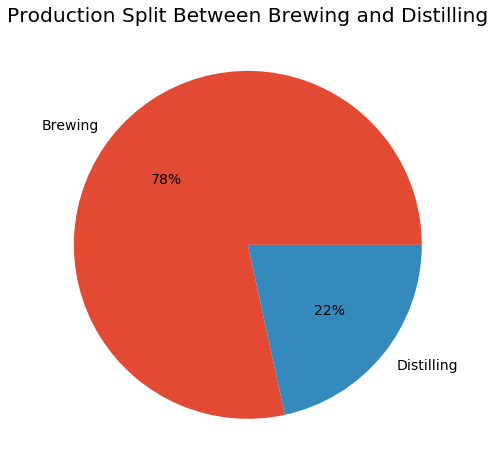

In [91]:
# Tidy up the plots - use more modern formatting (https://matplotlib.org/users/style_sheets.html)
plt.style.use('ggplot')
# Set the font size - https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 14})
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [8, 8]

# group the dataset by 'type' and count them
count = df.groupby('type').count()['variety']
# plot the pie chart
plt.pie(count,labels=count.index, autopct='%1.0f%%')
plt.title("Production Split Between Brewing and Distilling")

plt.show()

The data set contains 78% brewing batches and 22% distilling batches.

#### Data breakdown per variety

For each malt type, we will also need to know the breakdown per variety

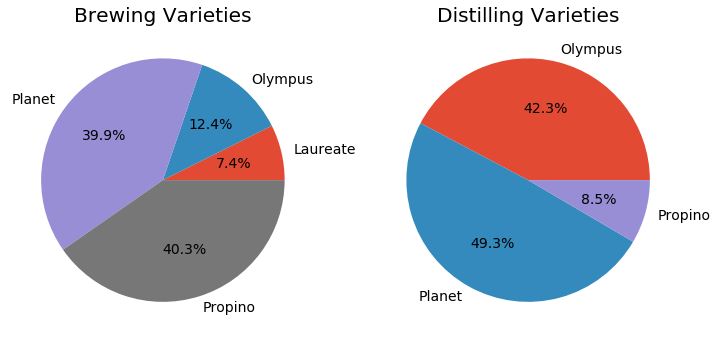

In [92]:
# create 2 new data frames based on the malt type
brewing = df.loc[df.loc[:, "type"] == 'Brewing']
distilling = df.loc[df.loc[:, "type"] == 'Distilling']
# resize the plots
plt.rcParams['figure.figsize'] = [12, 12]

# group the datasets by 'variety' and count them
brew_count = brewing.groupby('variety').count()['protein']
dist_count = distilling.groupby('variety').count()['protein']

# plot the pie charts with sub plots
plt.subplot(1, 2, 1, title='Brewing Varieties')
plt.pie(brew_count,labels=brew_count.index, autopct='%1.1f%%')
plt.subplot(1, 2, 2, title ='Distilling Varieties')
plt.pie(dist_count,labels=dist_count.index, autopct='%1.1f%%')
plt.show()

The brewing batches are broken down per variety as follows:
* approx 40% Planet
* approx 40% Propino
* approx 7.5% Laureate
* approx 12.5% Olympus

The distilling batches are broken down per variety as follows:
* approx 42.5% Olympus
* approx 49% Planet
* approx 8.5% Propino

#### Protein Levels in the Grain

In this part we need to understand what the protein levels are like in the grain. Initially we will look at the whole dataset - but then we will need to drill down in the the various malt types and barley varities.

The next step is to look at plot a histogram of the *proteins* column from the entire data set. This will give us an idea of what the disribution of protein is like.

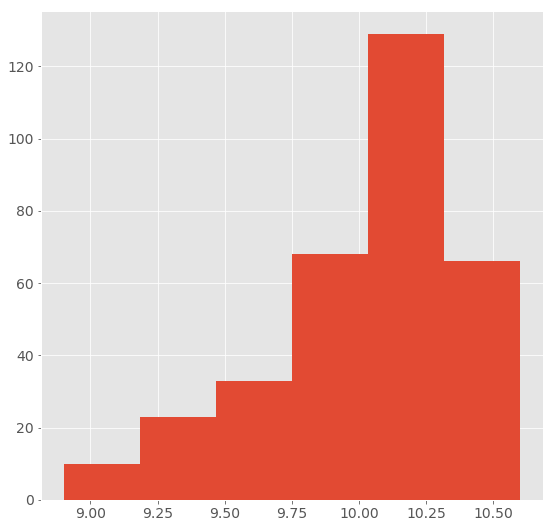

In [116]:
# resize the plots
plt.rcParams['figure.figsize'] = [9, 9]
# plot the histogram of the protein values
plt.hist(df['protein'], bins=6)
plt.show()

Looking at this histogram plot - the data looks to be somewhat normally distributed - however the distribution is *truncated* [17]. This means that the x values are restricted. In order to test the fit of the truncated normal distribution - we'll need the mean and standard deviation of the proteins, as well as the maximum and minimum allowed values. We can used the `pandas describe()` function to calculate these.

In [117]:
# Summarise the proteins
df.describe().loc[['mean','std', 'min', 'max']]['protein']

mean    10.045593
std      0.367905
min      8.900000
max     10.600000
Name: protein, dtype: float64

The next step is to plot the *truncated normal distribution* using these parameters and compare it to the histogram to check the fit.

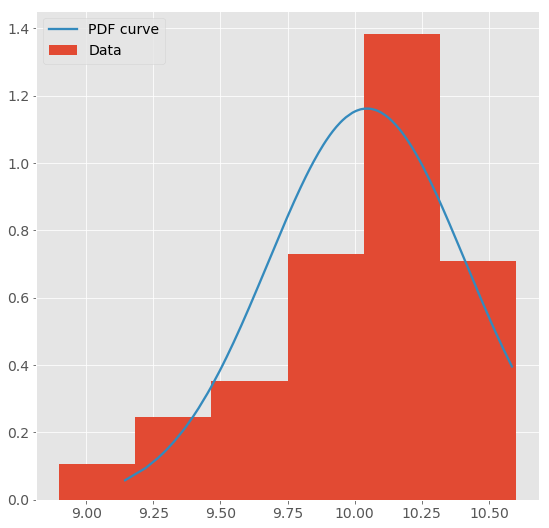

In [118]:
# code adapted from https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

# lower, upper, mu, and sigma are four parameters
lower, upper = df['protein'].min(), df['protein'].max()
mu, sigma = df['protein'].mean(), df['protein'].std()

# create an object X using the above four parameters,
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

# generate 300 sample data
samples = X.rvs(300)

# compute the PDF of the sample data
pdf_probs = stats.truncnorm.pdf(samples, (lower-mu)/sigma, (upper-mu)/sigma, mu, sigma)

# make a histogram for the samples
plt.hist(df['protein'], bins=6, density=True, label='Data')

# plot the PDF curves 
plt.plot(samples[samples.argsort()],pdf_probs[samples.argsort()],linewidth=2.3,label='PDF curve')

# legend
plt.legend(loc='best')
plt.show()

Taking the data set as a whole, and comparing the histogram to a truncated normal distribution shows that they are probably close enough to use the truncated distribution in a model. However, some further analysis is required. The barley from brewing is expected to have higher proteins that the distilling barley, so we should investigate if this distribution is still appropriate when this distinction is made.

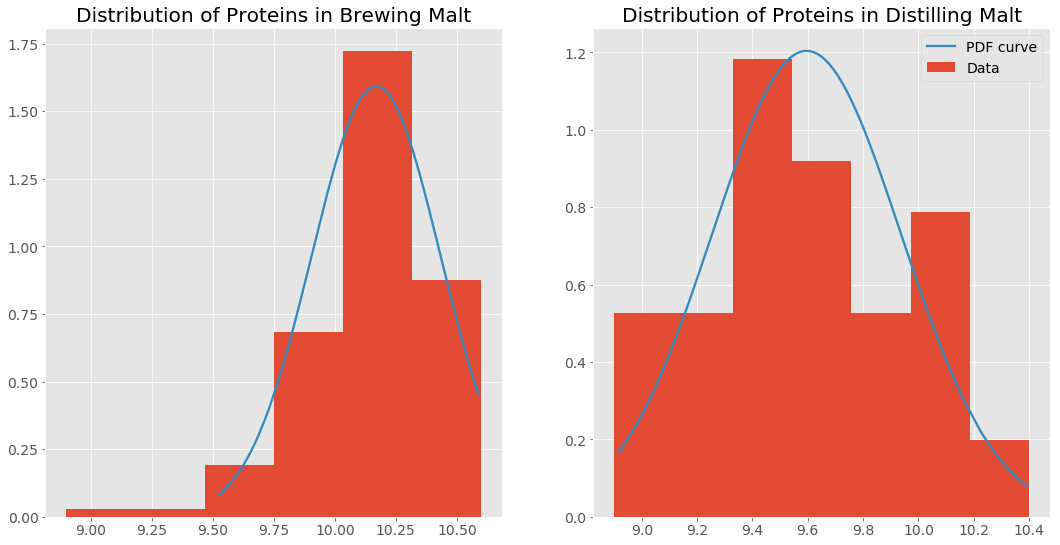

In [119]:
# Resize the plots
plt.rcParams['figure.figsize'] = [18, 9]
# lower, upper, mu, and sigma are calculated for brewing
b_lower, b_upper = brewing['protein'].min(), brewing['protein'].max()
b_mu, b_sigma = brewing['protein'].mean(), brewing['protein'].std()

# lower, upper, mu, and sigma are calculated for distilling
d_lower, d_upper = distilling['protein'].min(), distilling['protein'].max()
d_mu, d_sigma = distilling['protein'].mean(), distilling['protein'].std()

# create an object b_X for brewing using the above four parameters,
b_X = stats.truncnorm((b_lower - b_mu) / b_sigma, (b_upper - b_mu) / b_sigma, loc=b_mu, scale=b_sigma)

# create an object d_X for distilling using the above four parameters,
d_X = stats.truncnorm((d_lower - d_mu) / d_sigma, (d_upper - d_mu) / d_sigma, loc=d_mu, scale=d_sigma)

# generate 300 sample data for brewing
b_samples = b_X.rvs(300)

#generate 300 sample data for distilling
d_samples = d_X.rvs(300)

# compute the PDF of the sample data for brewing 
b_pdf_probs = stats.truncnorm.pdf(b_samples, (b_lower-b_mu)/b_sigma, (b_upper-b_mu)/b_sigma, b_mu, b_sigma)

# compute the PDF of the sample data for distilling
d_pdf_probs = stats.truncnorm.pdf(d_samples, (d_lower-d_mu)/d_sigma, (d_upper-d_mu)/d_sigma, d_mu, d_sigma)

# make a histogram for the brewing samples
plt.subplot(1, 2, 1, title='Distribution of Proteins in Brewing Malt')
plt.hist(brewing['protein'], bins=6, density=True, label='Data')
plt.plot(b_samples[b_samples.argsort()],b_pdf_probs[b_samples.argsort()],linewidth=2.3,label='PDF curve')

# make a histogram for the distilling samples
plt.subplot(1, 2, 2, title='Distribution of Proteins in Distilling Malt')
plt.hist(distilling['protein'], bins=7, density=True, label='Data')
plt.plot(d_samples[d_samples.argsort()],d_pdf_probs[d_samples.argsort()],linewidth=2.3,label='PDF curve')

# legend
plt.legend(loc='best')
plt.show()

The above plots demonstrate that althogh the means, standard deviations, minimum and maximum values vary between the brewing and distilling data, a truncated normal distribution can be used to approximate values for either. It is important, however, that in order to be accurate as possible we will need to calculate the min, max, mean and standard deviation for each malt type and barley variety pairing in the dataset - this will allow us to simulate a more accurate replica of the dataset. 

The next step is to understand the relationship between the protein and extract for brewing malt, and the relationship between protein and PSY for distilling malt. To do this, a scatter plot of each will be plotted and linear regression will be used to summarise the relationships.

#### Protein vs. Extract and PSY

First, we'll look at the relationship between the protein and extract for brewing malt.

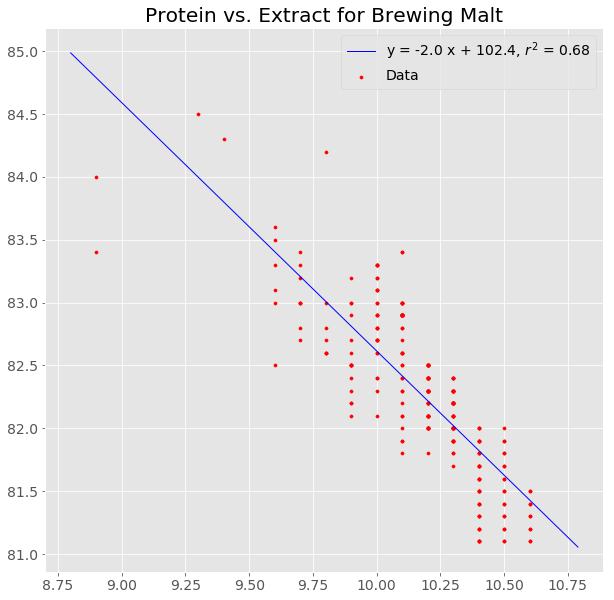

In [120]:
# Resize the plots
plt.rcParams['figure.figsize'] = [10, 10]
# Plot Protein vs Extract for brewing malt
plt.scatter(brewing.loc[:, 'protein'], brewing.loc[:, 'extract'],c='red', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
bre_slope, bre_intercept, bre_r_value, bre_p_value, bre_std_err = stats.linregress(brewing.loc[:, 'protein'], brewing.loc[:, 'extract'])
bre_line_x = np.arange(8.8, 10.8, 0.01)
bre_line_y = bre_slope*bre_line_x + bre_intercept

# Plot the best fit line
plt.plot(bre_line_x, bre_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(bre_slope, bre_intercept, bre_r_value**2))
plt.title("Protein vs. Extract for Brewing Malt")
plt.legend()
plt.grid(True)

The above plot shows that there is a quite a strong relationship between the protein and the extract. We have also calculated the best fit line using regression. The r<sup>2</sup> value for the plot is 0.68, this is quite high and reiterates the strenght of the correlation. A note on the distributuion of the extracts, for most protein levels the extract values are spread evenly about the best fit line, with aproximately even numbers of points above and below the line. Also, they are all with 0.6% extract from the line. So, we can approximate that the points are normally distributed about the line with a mean of 0, and a standard deviation of 0.2 based on the [Empirical Rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), 99.7% of the values will then fall within $\pm$ 0.6% of the line.

The step is to look at the relationship between protein and PSY for distilling malt.

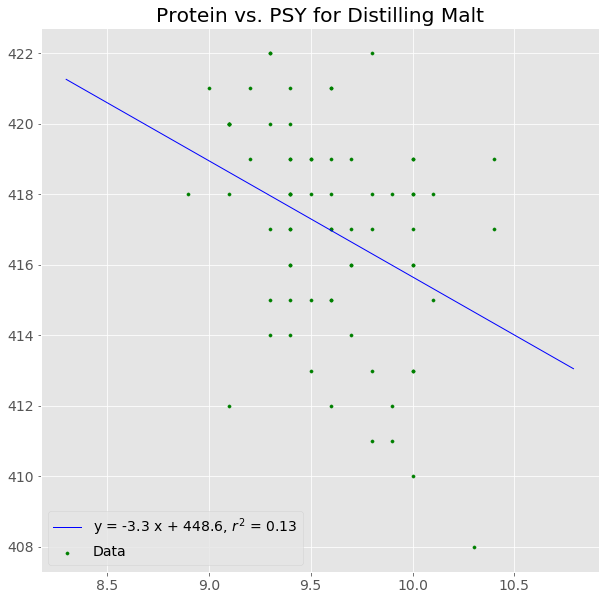

In [121]:
# Resize the plots
plt.rcParams['figure.figsize'] = [10, 10]
# Plot Protein vs PSY for distilling malt
plt.scatter(distilling.loc[:, 'protein'], distilling.loc[:, 'psy'],c='green', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
dis_slope, dis_intercept, dis_r_value, dis_p_value, dis_std_err = stats.linregress(distilling.loc[:, 'protein'], distilling.loc[:, 'psy'])
dis_line_x = np.arange(8.3, 10.8, 0.01)
dis_line_y = dis_slope*dis_line_x + dis_intercept

# Plot the best fit line
plt.plot(dis_line_x, dis_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(dis_slope, dis_intercept, dis_r_value**2))
plt.title("Protein vs. PSY for Distilling Malt")
plt.legend()
plt.grid(True)

The above plot shows that there is a negative correlation between the protein and the PSY. The r<sup>2</sup> value for the plot is 0.13, this is quite low and means that there are many other factors that influence the PSY, not just the protein in the barley. We expect this to be so as the PSY can also vary based on the barley growing conditions as well as the malt processing conditions. Looking at the distribution of the PSYs, again they're is appoximately as many points above the line as below the line, but due to the low r<sup>2</sup> value the standard deviation is high at approx 1.8 units. 

#### Summary of the Analysis

Having analysed the existing data set, we now have everything we need for our simulation. The data will be synthesised based on the following conditions:

* The dataset will have approximately 78% 'Brewing' data points, and 22% 'Distilling' data points
* The 'Brewing' data will have a varietal split as follows - 40% 'Planet', 40% 'Propino', 12.5% Olympus, 7.5% Laureate
* The 'Distilling' data will have a varietal split as follows - 49% 'Planet', '42.5% Olympus', '8.5% Propino'
* The proteins for the dataset are distributed with a truncated normal distribution, the mean, standard deviation, max and min values are to be calculated per malt type and  barely variety.
* The extracts for the brewing batches will be calculated based on the protein values and the linear regression line that was calculated (*y = -2.0x + 102.4*)
* The PSY's for the distilling batches will be calculated based on the protein values and the other linear regression line that was calculated (*y = -3.3x + 448.6)

## 4. Data Simulation

In this section a new dataset will be simulated using the parameters that were determined in section 3. The dataset will be created by first creating a list for each column and then creating a `pandas` dataframe to join them all together. The dataset I create will have 400 data points in it, and will require the following 5 columns:
1. type
1. variety
1. protein
1. extract
1. psy

### 4.1 Categorical data
The first step is to create a 2 lists with the categorical data in them.

In [99]:
# define allowed malt types and barley varieties
types_all = ['Brewing', 'Distilling']
varieties_all = ['Planet', 'Propino', 'Olympus', 'Laureate']

# create a list with 400 malt types in the correct proportions
my_types = [np.random.choice(types_all, p=(0.78,0.22)) for i in range(400)]

# create a list with the barley varieties
my_varieties = []
for i in my_types:
# check the type list if its a 'Brewing' batch - select the variety based on the the calculated probability    
    if i == 'Brewing':
        my_varieties.append(np.random.choice(varieties_all, p=(0.4, 0.4, 0.125, 0.075)))
# else if its a 'Distilling' batch - select the variety based on the the calculated probability   
    elif i == 'Distilling':
        my_varieties.append(np.random.choice(varieties_all, p=(0.49,0.085,0.425,0)))

### 4.2 Simulating the protein data

Having creating 2 lists with the malt types and barley varieties, the next step is to create the list of proteins. As demonstrated in section 3 these will be selected from a truncated normal distribution. The process will be to iterate through the 2 lists already created in section 4.1, and then to calculate the the mean, standard deviation, min and max by comparing these to the existing dataset that was analysed in section 3. These values are then plugged into the truncated normal distribution function to select a protein value.

In [100]:
# create an empty list to store the protein values
protein = []

# define a helper function to filter the original dataset based on a given malt type and barley variety
def data_filter(data, malt, barley):
    return data.loc[(data.loc[:, "type"] == malt) & (data.loc[:, "variety"] == barley)]

# iterate through the catergorical data
for i in range(len(my_types)):
    x = data_filter(df, my_types[i], my_varieties[i])
    # for each item in the lists calculate the parameters for a truncated normal distribution
    lower, upper = x.min()['protein'], x.max()['protein']
    mu, sigma = x.mean()['protein'], x.std()['protein']
    # choose an item from the truncated normal distribution and add it to the protein list
    protein.append(round(stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(),1))

### 4.3 Simulating the extract data

Having simulated data for the protein, the next step is to simulated extract data for the brewing batches. This will be done by iterating through the `my_types` list, and calcuating the appropriate extract value based on the regression line calculated in section 3. In order to simulate the spread of data about the line as in the original set, we will add some random, normally distributed noise to the calculation (with $\mu$ = 0, $\sigma$ = 0.2). 

In [101]:
# create an empty list to store the extract values
extract = []
# iterate though the types
for i in range(len(my_types)):
# if the type is brewing, calculate the extract and add it to the list    
    if my_types[i] == 'Brewing':
        extract.append(round((-2.0 * protein[i] + 102.4 + np.random.normal(0,0.2)),1))
# if the type is ditilling add an empty value        
    elif my_types[i] == 'Distilling':
        extract.append("")       

### 4.4 Simulating the PSY data

This will be done using a similar method as for the extract list. In the case we will use the other regression line that was calculated, and we will only create PSY values for distilling data. As for the brewing extract values, we will add some normally distributed noise to the calculation ($\mu$ = 0, $\sigma$ = 1.8)

In [102]:
# create an empty list to store the PSY values
psy = []
# iterate though the types
for i in range(len(my_types)):
# if the type is brewing, calculate the extract and add it to the list    
    if my_types[i] == 'Brewing':
        psy.append("") 
# if the type is ditilling add an empty value        
    elif my_types[i] == 'Distilling':
        psy.append(int((-3.3* protein[i] + 448.6 + np.random.normal(0,1.8))))          

### 4.5 Creating a Pandas Dataframe

In this section the 5 lists that were created will be joined together as 1 dataframe.

In [103]:
# create dataframe
sim_data = pd.DataFrame({'type':my_types, 'variety':my_varieties, 'protein':protein, 'extract':extract, 'psy':psy}) 
# sample the data frame to look at 10 random points from
sim_data.sample(10)

,type,variety,protein,extract,psy
145,Brewing,Propino,10.3,81.7,
124,Distilling,Olympus,9.4,,414
2,Brewing,Propino,10.6,81,
320,Distilling,Planet,9.6,,415
240,Brewing,Propino,10.0,82.7,
102,Brewing,Planet,10.5,81.4,
360,Distilling,Planet,9.6,,417
252,Brewing,Propino,10.4,81.7,
248,Distilling,Planet,9.9,,414
139,Distilling,Olympus,9.4,,418


Looking at the 10 random points generated above we can see the following:
* There are more brewing data points than distilling
* The barely varieties seem to be selected as directed by the algorithm (i.e. there are no laureate data points for distilling malt)
* The protein values seem to be in the correct ranges
* There are extracts calculated for the brewing data points but not the distilling data points
* There are PSYs calculated for the the distilling data points but not the brewing data points

In broad terms, the simulated data looks like it does what was expected. In section 5, the simulated data set will be analysed and compared to the orignal data set to see how accurate the simulation method used was.

## 5. Discussion

In this section, the simulated data set will be analysed and compared to the original data set. The points for consideration are as follows:

* The ratio of brewing batches to distilling batches (malt type)
* The proportion of batches made from each barley variety for each malt type
* The typical protein levels in the barley and the distribution of it - this is expected to vary per malt type and barley variety
* The relationship between the extract and the protein for brewing batches
* The relationship between the spirit yield and the protein for the distilling barley

### 5.1 The ratio of brewing batches to distilling batches

The first step in the analysis is to look at the proportion of brewing data points to distilling data points for our simulated data set and compare this to the equivalent data from our original data set. The best way to visulaise this is to use side-by-side pie charts.

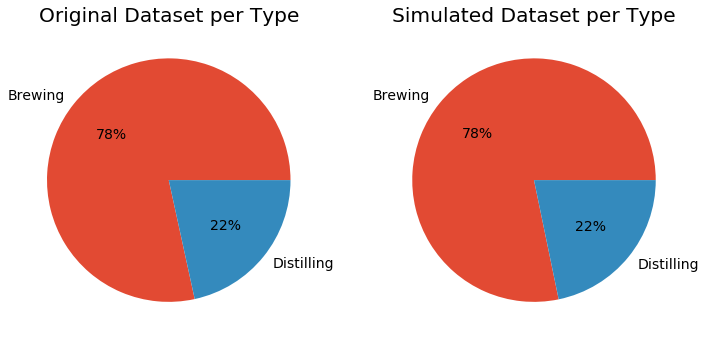

In [122]:
# group the original dataset by 'type' and count it
count = df.groupby('type').count()['variety']
# group the simulated dataset by 'type' and count it
count_sim = sim_data.groupby('type').count()['variety']

# Resize the plots
plt.rcParams['figure.figsize'] = [12, 12]

# Plot the pie xharts
plt.subplot(1, 2, 1, title='Original Dataset per Type')
plt.pie(count,labels=count.index, autopct='%1.0f%%')
plt.subplot(1, 2, 2, title ='Simulated Dataset per Type')
plt.pie(count_sim,labels=count_sim.index, autopct='%1.0f%%')
plt.show()

The above plots show that our original dataset has 78% brewing data in it whereas the simulated data is close to this. The simulated dataset is relatively small with only 400 data points - and I believe that this is a reasonalbe simulation for a dataset of this size.

### 5.2 The proportion of barley varieties per malt type

The next step is consider the proportion of barley varieties used for each malt type. Again I beleive side-by-side pie charts are the best way to visualise this. The first thing we need to do is look at the simulated dataset and count how many data points are brewing, and how many are distlling, and then to group these by the barley variety. The code below achieves this.

In [105]:
  # create 2 new data frames based on the malt type
sim_brew = sim_data.loc[sim_data.loc[:, "type"] == 'Brewing']
sim_dist = sim_data.loc[sim_data.loc[:, "type"] == 'Distilling']

# group the datasets by 'variety' and count them
sim_brew_count = sim_brew.groupby('variety').count()['protein']
sim_dist_count = sim_dist.groupby('variety').count()['protein']

The next step is to plot the original brewing data per malt, and the simulated data per malt type and then to compare them.

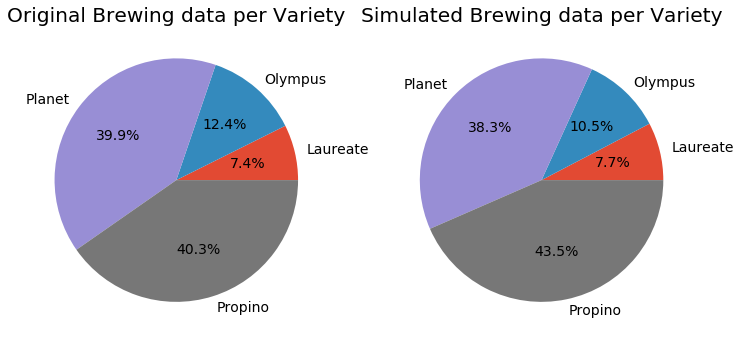

In [106]:
# the first sub-plot is the original data
plt.subplot(1, 2, 1, title='Original Brewing data per Variety')
plt.pie(brew_count,labels=brew_count.index, autopct='%1.1f%%')

# the second plot is the simulated data
plt.subplot(1, 2, 2, title='Simulated Brewing data per Variety')
plt.pie(sim_brew_count,labels=sim_brew_count.index, autopct='%1.1f%%')
plt.show()

Similarily, we can plot the distilling data:

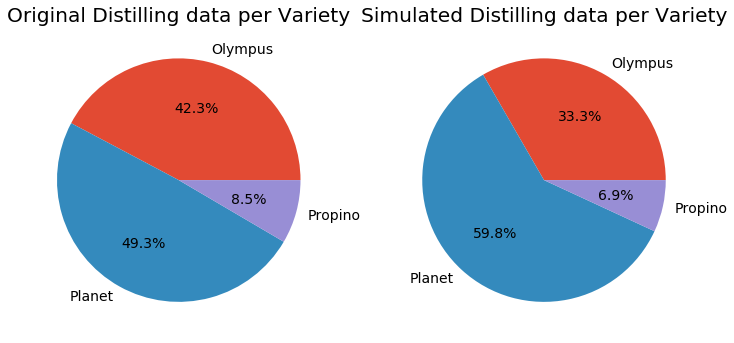

In [107]:
# the first sub-plot is the original data
plt.subplot(1, 2, 1, title ='Original Distilling data per Variety')
plt.pie(dist_count,labels=dist_count.index, autopct='%1.1f%%')

# the second plot is the simulated data
plt.subplot(1, 2, 2, title ='Simulated Distilling data per Variety')
plt.pie(sim_dist_count,labels=sim_dist_count.index, autopct='%1.1f%%')
plt.show()

Bearing in mind that the algorithm has to simulate data based on 7 different malt/barley pairings out of a small data set of 400, (and apporximately only 80 of there are distilling), and that each of these pairings had particular distribution parameters assigned to it based on analysis of the original data set, I believe that this has sucessfully simulated the varietal makeup of the dataset based on the malt types in it.

### 5.3 The protein levels per malt type

The next step is to compare the distribution of proteins per malt type in the simulated data set to the original data. The best way to compare these is to use a box plot. Box plots are great for comparing a single data value (such as protein) across a range of data classifications (brewing, ditilling etc).

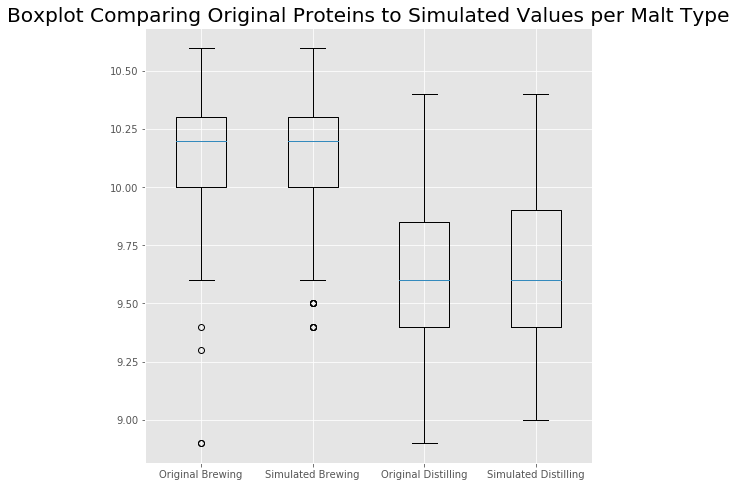

In [123]:
# Resize the plots
plt.rcParams['figure.figsize'] = [8, 8]

# Plot a box plot of displaying the original brewing and distilling as well as the simulated data for each
# Matplotlib boxplot documentation - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot([brewing['protein'], sim_brew['protein'], distilling['protein'], sim_dist['protein']], labels=['Original Brewing','Simulated Brewing','Original Distilling','Simulated Distilling'])
plt.title('Boxplot Comparing Original Proteins to Simulated Values per Malt Type')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

First looking at the comparison between the original and simulated data for the brewing malt type. The median looks exactly the same for both (approx 10.2) likewise for the 1<sup>st</sup> and 3<sup>rd</sup> quartiles (10.0 and 10.3 respectively). The maximum and minimimum values also look identical (9.6 and 10.7 respectively). Neither data set has outliers above the maximum values, and both have some below the minimum). So overall I would say that the the algorithm has done an excellent job at simulating protein values for the brewing data points in this set.

Looking at the distilling data set and the simulation is also good, however the repeatablilty of the distilling simulation is not a consistent as there fewer disitilling data points than brewing data in the set (there are only about 80 distilling data points). On some simulations, the range and inter-quartile range are not as representative of the distilling data as they are of the brewing data.

I have run the simulation for a large dataset with 10,000 points in it and the results below show that for large data sets the simulation will accurately resemble the original data.

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-pfda-project/master/img/boxplot.png" width="1300"/></p>

### 5.4 The relationship between protein and extract (brewing)

In this section, we will analyse the relationship between protein and extract for the brewing batches in the simulated data set. We will do this by plotting a scatter plot for the data and comparing it to the scatter plot we created for the original data set. We will also plot the best fit line using linear regression and compare this line to the original line.

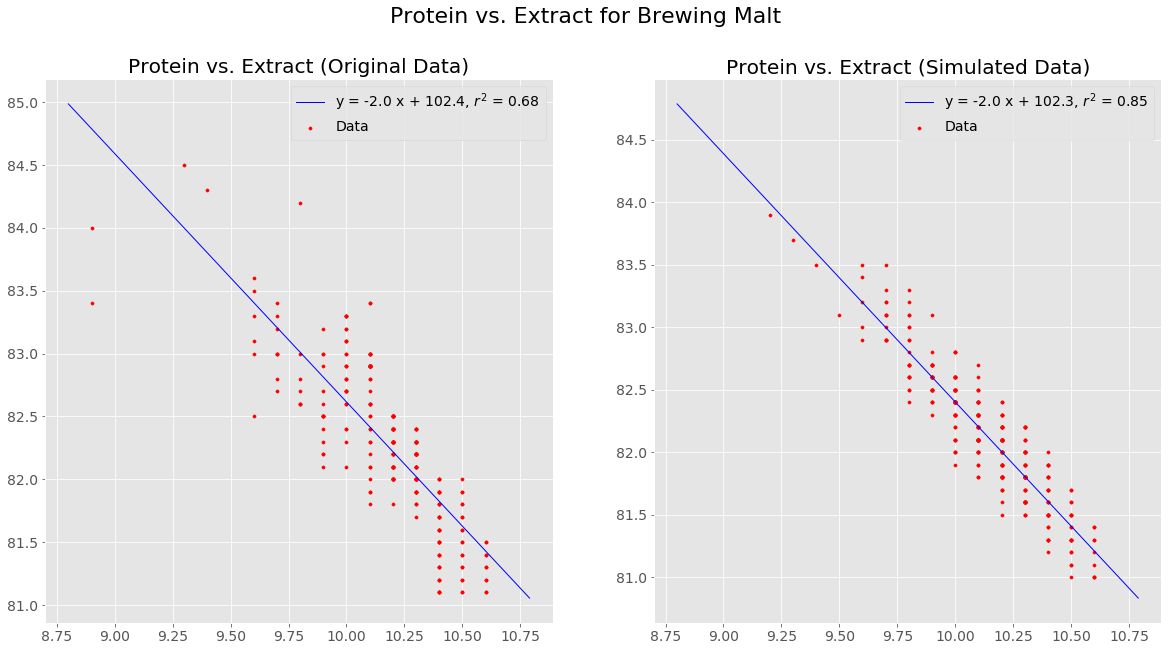

In [88]:
# Calculate the linear statistics for the simulated brewing data using stats.linregress()
b_sim_slope, b_sim_intercept, b_sim_r_value, b_sim_p_value, b_sim_std_err = stats.linregress(sim_brew.loc[:, 'protein'].astype(float), sim_brew.loc[:, 'extract'].astype(float))
# Calculate the x and y values for the best fit line
b_sim_line_x = np.arange(8.8, 10.8, 0.01)
b_sim_line_y = b_sim_slope*b_sim_line_x + b_sim_intercept

# Resize the plots
plt.rcParams['figure.figsize'] = [20, 10]
# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot Protein vs Extract for original brewing data
ax1.scatter(brewing.loc[:, 'protein'], brewing.loc[:, 'extract'],c='red', label='Data', s=10)
#Plot the best fit line for original brewing data
ax1.plot(bre_line_x, bre_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(bre_slope, bre_intercept, bre_r_value**2))
# Add title and legend to the 1st plot 
ax1.set_title('Protein vs. Extract (Original Data)')
ax1.legend(loc="upper right")

# Plot Protein vs Extract for simulated brewing data
ax2.scatter(sim_brew['protein'], sim_brew['extract'],c='red', label='Data', s=10)
#Plot the best fit linefor simulated brewing data
ax2.plot(b_sim_line_x, b_sim_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(b_sim_slope, b_sim_intercept, b_sim_r_value**2))
# Add title and legend to the 2nd plot 
ax2.set_title('Protein vs. Extract (Simulated Data)')
ax2.legend(loc="upper right")

# Add a main title to the plot
plt.suptitle("Protein vs. Extract for Brewing Malt", fontsize=22)
plt.grid(True)
plt.show()

The scatter plots above show that the extract values have been simulated in line with the relationship defined by the original data set. This the data points are scatter in a similar way in both plots, and both regression lines yield very similar results over the range of our protein data values. The simulation algorithm was quite successful in this regard.

Similarly, we can compare the relationship between protein and PSY for the simulated distilling data points.

### 5.5 The relationship between protein and PSY (distilling)

The last thing to analyse in the data set is the scatter plot of protein versus PSY for the distilling data. A similar approach will taken as before with the brewing data.

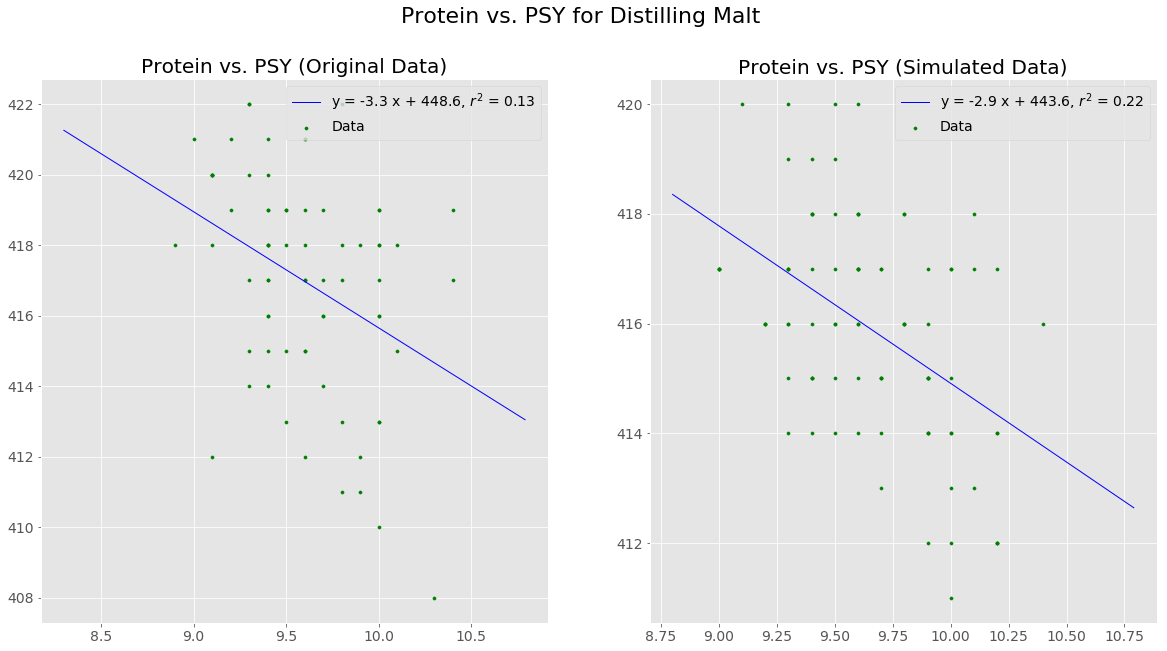

In [124]:
# Calculate the linear statistics for the simulated brewing data using stats.linregress()
d_sim_slope, d_sim_intercept, d_sim_r_value, d_sim_p_value, d_sim_std_err = stats.linregress(sim_dist.loc[:, 'protein'].astype(float), sim_dist.loc[:, 'psy'].astype(float))
# Calculate the x and y values for the best fit line
d_sim_line_x = np.arange(8.8, 10.8, 0.01)
d_sim_line_y = d_sim_slope*d_sim_line_x + d_sim_intercept

# Resize the plots
plt.rcParams['figure.figsize'] = [20, 10]
# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot Protein vs PSY for original distilling data
ax1.scatter(distilling.loc[:, 'protein'], distilling.loc[:, 'psy'],c='green', label='Data', s=10)
# Plot the best fit line for original brewing data
ax1.plot(dis_line_x, dis_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(dis_slope, dis_intercept, dis_r_value**2))
# Add title and legend to the 1st plot 
ax1.set_title('Protein vs. PSY (Original Data)')
ax1.legend(loc="upper right")

# Plot Protein vs Extract for simulated distilling data
ax2.scatter(sim_dist['protein'], sim_dist['psy'],c='green', label='Data', s=10)
#Plot the best fit line for simulated distilling data
ax2.plot(d_sim_line_x, d_sim_line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r^2$ = %.2f'%(d_sim_slope, d_sim_intercept, d_sim_r_value**2))
# Add title and legend to the 2nd plot 
ax2.set_title('Protein vs. PSY (Simulated Data)')
ax2.legend(loc="upper right")

# Add a main title to the plot
plt.suptitle("Protein vs. PSY for Distilling Malt", fontsize=22)
plt.grid(True)
plt.show()

The simulation has provided a reasonable approximation of the distilling data. The regression line is not quite as accurate as for the brewing equivalent but again I believe that with more data points the simulation would be more representation of the original dataset.

## 6. Conclusion

### 6.1 Summary of the project

The objectives of the project (adapted from the project brief) were to sythesise a data set based on some real world phenomenon, requiring an investigation in to the pheonmenon and then using  the `numpy.random` package in Python to simulated some data based on this. Specifically I had to:

1. Choose a real-world phenomenon that can be measured and for which I could collect at least one-hundred data points across at least four different variables.
1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
1. Synthesise/simulate a data set as closely matching their properties as possible.
1. Detail the research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

This Jupyter notebook has served as documentation for the project, and it can be seen that the project objectives have been met. The phenomoenan chosen was from my professional life, where I looked at the relationship between protein in malting barley and the quality of the malt produced for both brewing and distilling malt. The project started with some internet research into the malting process and supply chain. This served as introduction to the problem but also demonstrated the complex relationships between the variables. The next step was to take an existing dataset which I have - this was based on real production data - and analyse it to understand the variables in the dataset and the relationships between them. 

Once I had an understanding of the variables in the dataset and how they played with one another, It allowed me to develop an algorithm for simulating another dataset that was similar to the original one. The simulated data was then analysed and compared to the original dataset to see how successful the simulation was. The simulated data was found to compare very well with the original dataset. There were some discrepencies found in the simulated distilling data - but this was due to the fact that the algorithm only simulated about 80 of these data points. When a larger dataset was created it was shown that the simulation algorithm worked more accurately. 

A full list of references was maintained throughout the project and this can be found at the end of this Jupyter notebook file.

### 6.2 Learning outcomes

This project was a learning exercise to help develop programming and data analysis skills for the *Programming for Data Analysis* module of a Data Analytics Post Graduate Diploma course. Therefore if would be expected that some skills would be developed in both programming and data science during the course of the project. Some of the programming skills that were developed include:

1. Jupyter Notebooks: My use of Jupyter notebooks was developed during the course of the project
1. Using many differnet plot types in Python
1. Improved use of git for source control: In this project I began to interact with git from the command line rather than using the graphical shortcuts in VSCode
1. Create a dataframe from scratch using pandas
1. LaTex: This was my first experience with LaTex for creating some of the formulae in markdown
1. HTML: I learned how to integrate some raw HTML in the markdown cells to assist with formatting some of the images in the file.

Learnings in the field of data science include:

1. Developing work flows to generate and analyse simple random data sets
1. Introduction to the Truncated Normal Distribution
1. Linear regression and comaparing goodness of fit with r<sup>2</sup> value
1. The use of boxplots to compare the centre and spread of a dataset

Overall I found the project to be an excellent learning exercise and I feel that I met all of the project requirements while learning some new concepts and skills during the course of it.

## References

1. [1] Project Jupyter. Project Jupyter Home. (_https://www.jupyter.org/_)
1. [2] Numpy Deveolpment Team. Numpy Random Sampling (`numpy.random`). (_https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html_)
1. [3] Dr. Ian McLoughlin. GMIT. Project 2018: Programming for Data Analysis. (*https://github.com/ianmcloughlin/progda-project-2018/raw/master/project.pdf*)
1. [4] Ivor Murrell. Malt, Unravelling the Mystery. (*http://www.ukmalt.com/malt-unravelling-mystery*)
1. [5] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 68-69).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [6] The Maltsters' Association of Great Britain. Barley Requirements.  (*http://www.ukmalt.com/barley-requirements*)
1. [7] The Institute of Brewing and Distilling. General Certificate in Malting (pp 16).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [8] www.agriland.ie. New Boortmalt/IFA malting barley price arrangement announced (*https://www.agriland.ie/farming-news/new-boortmalt-ifa-price-arrangement-announced/*)
1. [9] www.yara.co.uk. How to influence barley grain quality. (*https://www.yara.co.uk/crop-nutrition/barley/influencing-barley-grain-quality/*)
1. [10] www.teagasc.ie The Spring Barley Guide. (*https://www.teagasc.ie/media/website/publications/2015/The-Spring-Barley-Guide.pdf*)
1. [11] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 23-24).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [12] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 27-37).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [13] The Institute of Brewing and Distilling. General Certificate in Malting (p. 20).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [14] The Institute of Brewing and Distilling. General Certificate in Malting (p. 38-47).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [15] The Institute of Brewing and Distilling. General Certificate in Malting (p. 48-53).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [16] The Institute of Brewing and Distilling. General Certificate in Malting (p. 64-66).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [17] www.statisticshowto.com. The Truncated Normal Distribution. (*https://www.statisticshowto.datasciencecentral.com/truncated-normal-distribution/*)

## End